## Regression Problem
### Data Description
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
Link - https://www.kaggle.com/harlfoxem/housesalesprediction

#### Importing various required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Importing the dataset

In [2]:
data = pd.read_csv('knc.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Analyzing the data and its various parameters

In [5]:
data.date[1][:8]

'20141209'

In [6]:
for i in range(0,21613):
    data.date[i] = data.date[i][:8]
    year = data.date[i][:4]
    month = data.date[i][4:6]
    day = data.date[i][6:]

C:\Users\Predator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
data.sort_values(by=['date'],
                 inplace=True,
                 ascending=True)
data.date.head(5)

16768    20140502
9596     20140502
9587     20140502
20602    20140502
11577    20140502
Name: date, dtype: object

In [8]:
df = pd.DataFrame(data)
df['year'] = year
df['month'] = month
df['day'] = day

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 16768 to 16594
Data columns (total 24 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
year             21613 non-null object
month            21613 non-null object


In [10]:
data.drop('date',
          axis=1,
          inplace=True)

In [11]:
data['year'] = data['year'].astype(str).astype(int)
data['month'] = data['month'].astype(str).astype(int)
data['day'] = data['day'].astype(str).astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 16768 to 16594
Data columns (total 23 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
year             21613 non-null int32
month            21613 non-null int32
day              21613 non-null int32
dty

#### Visualizing the data and its parameters

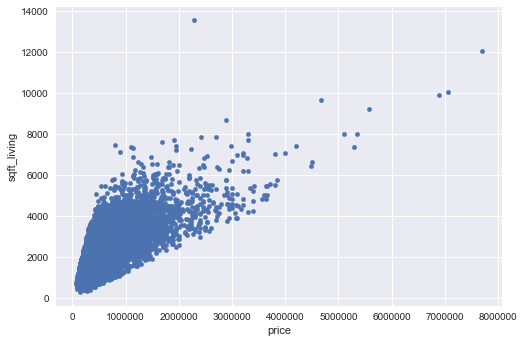

In [31]:
plt.style.use('seaborn')
data.plot(x='price', y='sqft_living', kind='scatter');

,price,sqft_living,sqft_living15,sqft_lot15,bedrooms,waterfront,lat,view,bathrooms,floors,sqft_basement,grade
price,1.000000,0.702035,0.585379,0.082447,0.308350,0.266369,0.307003,0.397293,0.525138,0.256794,0.323816,0.667434
sqft_living,0.702035,1.000000,0.756420,0.183286,0.576671,0.103818,0.052529,0.284611,0.754665,0.353949,0.435043,0.762704
sqft_living15,0.585379,0.756420,1.000000,0.183192,0.391638,0.086463,0.048858,0.280439,0.568634,0.279885,0.200355,0.713202
sqft_lot15,0.082447,0.183286,0.183192,1.000000,0.029244,0.030703,-0.086419,0.072575,0.087175,-0.011269,0.017276,0.119248
bedrooms,0.308350,0.576671,0.391638,0.029244,1.000000,-0.006582,-0.008931,0.079532,0.515884,0.175429,0.303093,0.356967
waterfront,0.266369,0.103818,0.086463,0.030703,-0.006582,1.000000,-0.014274,0.401857,0.063744,0.023698,0.080588,0.082775
lat,0.307003,0.052529,0.048858,-0.086419,-0.008931,-0.014274,1.000000,0.006157,0.024573,0.049614,0.110538,0.114084
view,0.397293,0.284611,0.280439,0.072575,0.079532,0.401857,0.006157,1.000000,0.187737,0.029444,0.276947,0.251321
bathrooms,0.525138,0.754665,0.568634,0.087175,0.515884,0.063744,0.024573,0.187737,1.000000,0.500653,0.283770,0.664983
floors,0.256794,0.353949,0.279885,-0.011269,0.175429,0.023698,0.049614,0.029444,0.500653,1.000000,-0.245705,0.458183


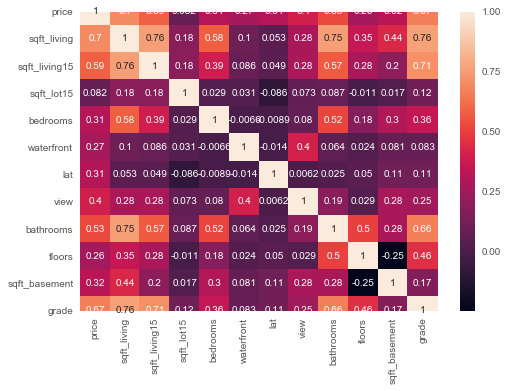

In [55]:
attributes = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot15', 'bedrooms',
              'waterfront', 'lat', 'view', 'bathrooms', 'floors', 'sqft_basement', 'grade']
sns.heatmap(data[attributes].corr(), annot=True)
data[attributes].corr()

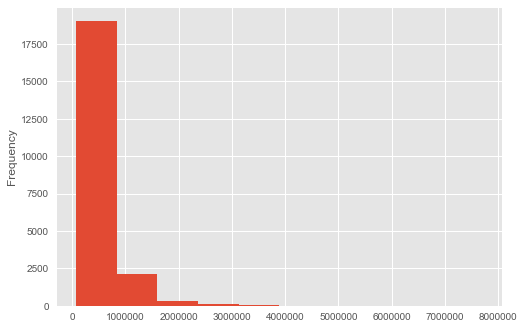

In [36]:
plt.style.use('ggplot')
data['price'].plot.hist();

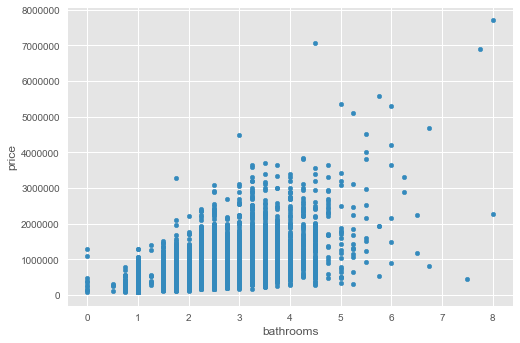

In [57]:
data.plot(x='bathrooms', y='price', kind='scatter');

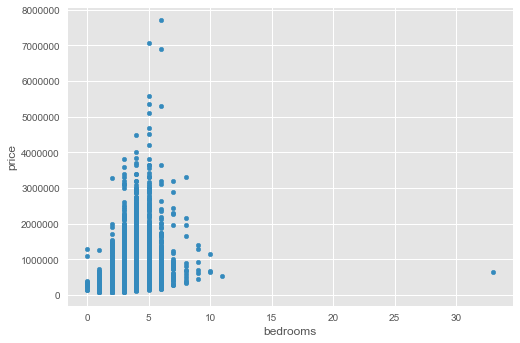

In [56]:
data.plot(x='bedrooms', y='price', kind='scatter');

#### Splitting the data into training and testing set

In [13]:
X = data.drop('price', axis=1)
y = data.price

In [14]:
np.random.seed(7)
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2)

#### Selecting the model and fitting it to training data

In [15]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(X_train, y_train)

C:\Users\Predator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 497 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [16]:
model.score(X_train, y_train)

0.9746469501043705

#### Performing cross-validation
It is very important to perform cross validation as it uses a limited sample of data in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
The acutual accuracy may differ(generally comes to be less than the non validated accuracy but is considered appropriate) 

In [17]:
from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor(n_estimators=10,
                            random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.84583825, 0.83184666, 0.84940365, 0.85542016, 0.87252526])

#### Tuning the hyperparameters of the model to see if we can increase the accuracy further

In [18]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   16.5s finished


Wall time: 17.8 s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [19]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

#### Best score after cross validation and hyperparameter tuning

In [20]:
rs_model.score(X_train, y_train)

0.9237786793527178

#### Various Evaluation Metrics

In [21]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = rs_model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Training R^2": r2_score(y_train, train_preds)}
    return scores

In [22]:
show_scores(rs_model)

{'Training MAE': 51437.07666931219,
 'Training RMSLE': 0.13318464860045132,
 'Training R^2': 0.9237786793527178}

#### Feature importance

In [62]:
model.feature_importances_

array([0.00837833, 0.00323857, 0.00614113, 0.23438363, 0.01224661,
       0.00180095, 0.03085766, 0.0096031 , 0.00306543, 0.34535403,
       0.02015865, 0.00833979, 0.02578214, 0.00232543, 0.01356809,
       0.16222463, 0.06793301, 0.03061705, 0.01398176, 0.        ,
       0.        , 0.        ])

In [63]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

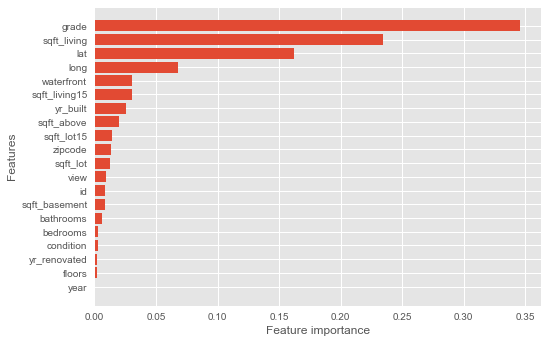

In [64]:
plot_features(X_train.columns, model.feature_importances_)